## <center> Bempp Performance Against Analytical Solutions:<br> Transmission Problem



#### Transmission Problem

Consider a region $\Omega^{+} \in \mathbb{R}^3$, let $\Gamma$ be its boundary and $\Omega^{-}$ be the exterior. The transmission problem (TP) for the Helmholtz scalar acoustic equation is given by
$$
\begin{aligned}
    \nabla^2 u^t + (\kappa^{\pm})^2 u^t &= 0 &&,\text{ in } \Omega^{\pm}\\
    u^{+} &= u^{-} &&,\text{ in } \Gamma\\
    \frac{1}{\rho^{+}} \partial_{\nu} u^{+} &= \frac{1}{\rho^{-}} \partial_{\nu} u^{-} &&, \text{ in } \Gamma
\end{aligned}
$$
where $\kappa^{\pm}$ and $\rho^{\pm}$ are the wave number and material density in $\Omega^{\pm}$ respectively. $u_t$ is the total wave in $\mathbb{R}^3$ and $u^{\pm}$ denote the wave in the exterior and interior domains respectively. Furthermore, $\partial_{\nu}$ is the normal derivative operator.

In this notebook, we consider the (TP) for $\Omega^{-}$ the sphere of radius $1$ and a plane wave traveling along the $+z$ axis.

#### Analytical Solution

We consider the incident wave $u^i(x,y,z) = e^{\textrm{i} \kappa_{+} z}$ valid in the exterior domain. Furthermore, in the exterior domain the exterior wave is decomposed as $u^{+} = u^i + u^s$, where $u^s$ is the scattered wave satisfying the sommerfeld radiation condition and is given in spherical coordinates by
$$
    u^s(r,\theta,\varphi) = \sum_{n=0}^{\infty} a_n h^{(1)}_{n}(\kappa_{+} r) P_n(\cos\theta)
$$
where $h^{(2)}_n$ is the spherical Hankel function of the first kind and $P_n$ is the Legrende polynomial. The coefficient $a_n$ for each $n$ is given by
$$
    a_{n}
    =
    \frac
    {%
        (2n+1) \textrm{i}^n
        \left[
            j_n(\kappa^{+} R)
            j'_{n}(\kappa^{-} R)
            -
            \rho \kappa
            j_{n}(\kappa^{-} R)
            j'_{n}(\kappa^{+} R)
        \right]
    }
    {%
        \rho \kappa
        j_{n}(\kappa^{-} R)
        h'^{(1)}_{n}(\kappa^{+} R)
        -
        j'_{n}(\kappa^{-} R)
        h^{(1)}_{n}(\kappa^{+} R)
    },
$$
where $\rho = \rho^{-}/\rho^{+}$ and $\kappa = \kappa^{+}/\kappa^{-}$.

On the other hand, the interior wave $u^{-}$ is given by
$$
    u^{-}(r,\theta,\varphi) = \sum_{n=0}^{\infty} b_n j_{n}(k^{-} r) P_n(\cos\theta)
$$
where the coefficients are written in terms of the $a_n$ described above
$$
    b_n = \frac{(2n + 1) \textrm{i}^n j_n(k^{+} R) + a_{n} h^{(1)}_{n} (\kappa^{+} R)}{j_{n}(\kappa^{-} R)}.
$$

#### BEM Formulation

Let $\gamma^{\pm}$ be the Cauchy trace operator for the exterior and interior domain respectively, given by:
$$
    \gamma^{\pm} =
    \begin{pmatrix}
        \gamma^{\pm}_{d} \\
        \gamma^{\pm}_{n}
    \end{pmatrix}.
$$
The total scattered field for the exterior and interior domain ($u^s,u^r$) can be obtained by first solving the following equation for $\gamma^{\pm} u^t$ 
$$
    (A^{+} + P^{-1} A^{-} P) \gamma^{+} u^{t} = \gamma^{+} u^{i},
$$
where $A^{\pm}$ is the multitrace operator for the exterior and interior domain, and $P$ is the matrix carrying information about the densities. They are defined as:
$$
    A^{\pm} = 
    \begin{pmatrix}
        -K & V \\
        D & K'
    \end{pmatrix},
    \quad\quad
    P = 
     \begin{pmatrix}
        1 & 0 \\
        0 & \rho^{-}/\rho^{+}
    \end{pmatrix}.
$$
Here $K,V,D$ and $K'$ are the double layer, single layer, hypersingular and adjoint double layer integral boundary operators. Then, the scattered pressure fields for the exterior and interior domain are given by
$$
    u^s = \mathcal{K}^{+} [\gamma^{+}_{d} u^t] - \mathcal{V}^{+} [\gamma^{+}_{n} u^t] \\
    u^r = \mathcal{V}^{-} [\rho \gamma^{+}_{n} u^t] - \mathcal{K}^{-} [\gamma^{+}_{d} u^t]
$$
where $\mathcal{V}^{\pm}$ and $\mathcal{K}^{\pm}$ are the potential boundary operators for the exterior and interior domains.

### Comparison

In [1]:
import os
import numpy as np
from numpy.linalg import norm
import bempp.api
import parameters as params

def load_analytical(ke,ki,re,ri):
    fname_a = params.FNAME_A(ke, ki, 1, 1)
    fpath_a = os.path.join(params.PATH_A, fname_a)
    
    analytical, it_a = np.load(fpath_a, allow_pickle=True)
    
    return analytical

def load_bempp(ke,ki,re,ri,n):
    fname_b = params.FNAME_B(ke, ki, 1, 1, n)
    fpath_b = os.path.join(params.PATH_B, fname_b)
    
    bem, it_b = np.load(fpath_b, allow_pickle=True)
    
    return bem

In [2]:
shape = (len(params.WAVE_NUMBERS), len(params.WAVE_NUMBERS), len(params.ELEM_WAVELENGTH))

fro_rel_error = np.zeros(shape)
inf_rel_error = np.zeros(shape)

for i, ke in enumerate(params.WAVE_NUMBERS):
    for j, ki in enumerate(params.WAVE_NUMBERS):
        analytical = load_analytical(ke,ki,1,1)

        for k, n in enumerate(params.ELEM_WAVELENGTH):
            # BEM 
            bem = load_bempp(ke,ki,1,1,n)
            
            # Compute error
            fro_rel_error[i][j][k] = norm(bem - analytical, 'fro') / norm(analytical, 'fro')
            inf_rel_error[i][j][k] = norm(bem - analytical, np.inf) / norm(analytical, np.inf)

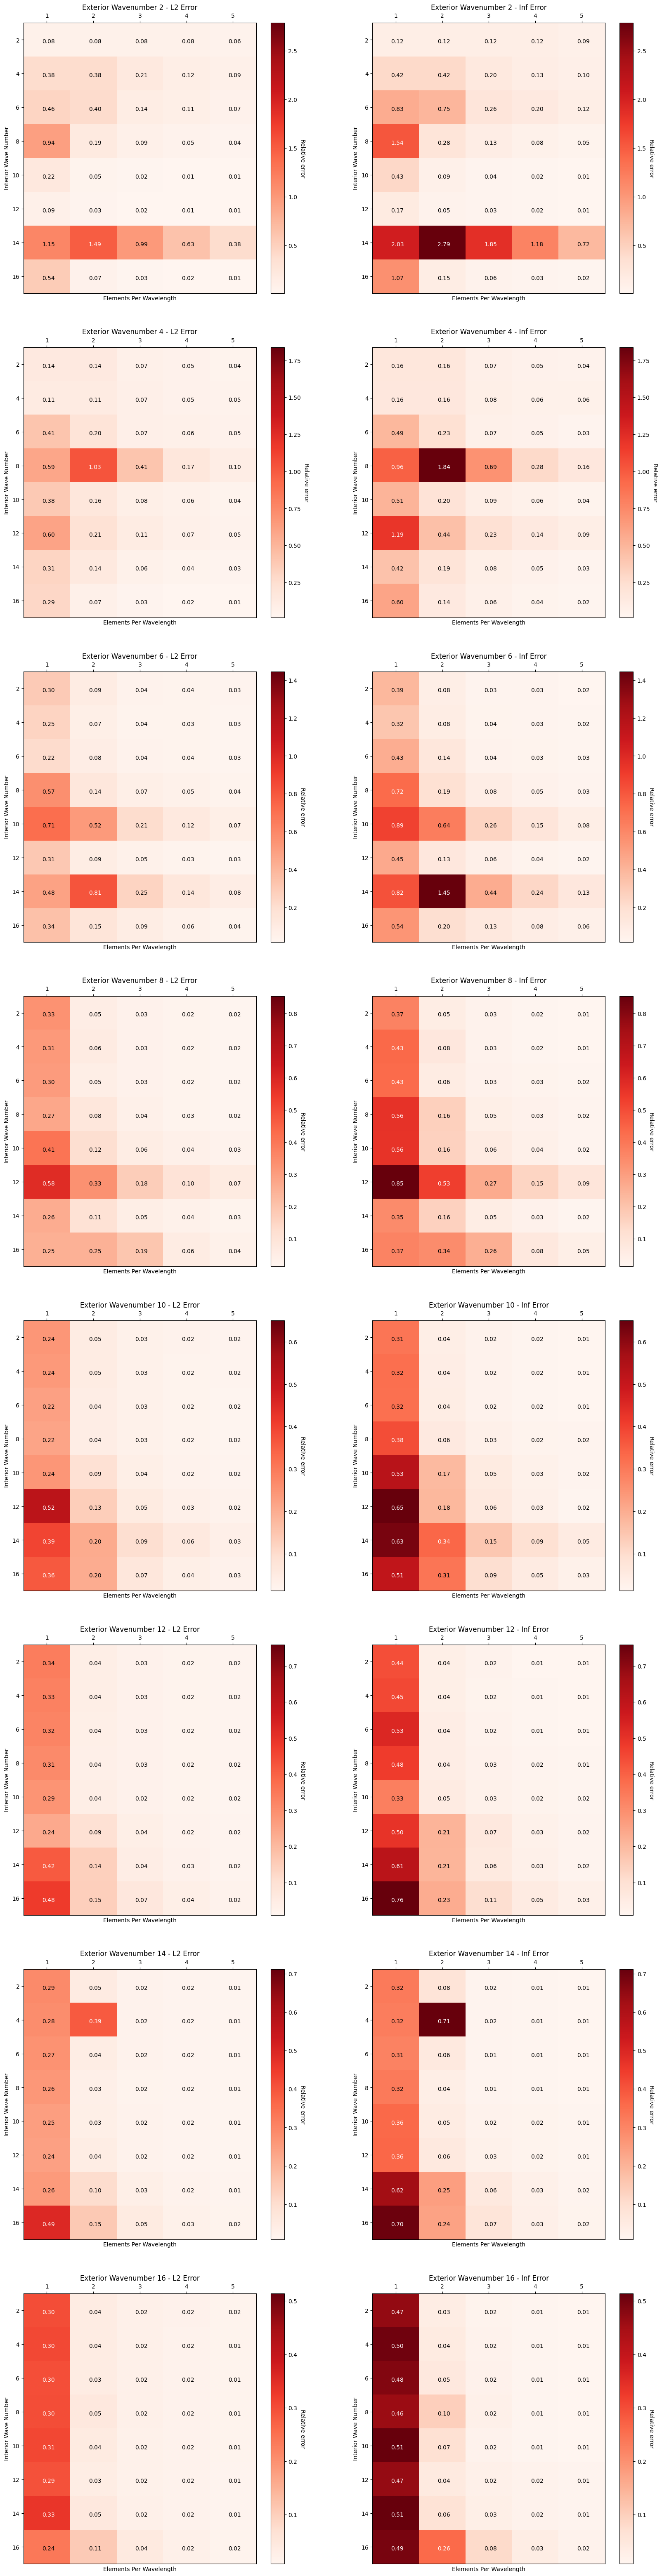

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

nrows = len(params.WAVE_NUMBERS)
ncols = 2

axs = (plt.figure(figsize=(10 * ncols,10 * nrows)).subplots(nrows=nrows, ncols=ncols))

plt_info = [
    ((axs[i][0], f"Exterior Wavenumber {ke} - L2 Error", fro_rel_error[i,:,:]),
    (axs[i][1], f"Exterior Wavenumber {ke} - Inf Error", inf_rel_error[i,:,:]))
    for i,ke in enumerate(params.WAVE_NUMBERS)
]

for each_plot in plt_info:
    #
    # ¡BE CAREFUL! Each row has its own error bar
    #
    vmin = np.amin((each_plot[0][2], each_plot[1][2]))
    vmax = np.amax((each_plot[0][2], each_plot[1][2]))
    for (ax, title, data) in each_plot:
        ax.set_title(title)
        
        # Plot data
        im = ax.imshow(data, cmap='Reds', aspect='auto', vmin=vmin, vmax=vmax)
        
        # Colorbar
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel('Relative error', rotation=-90, va="bottom")

        # Set labels
        ax.set_xlabel('Elements Per Wavelength')
        ax.set_ylabel('Interior Wave Number')
        ax.set_xticks(np.arange(data.shape[1]), labels=params.ELEM_WAVELENGTH)
        ax.set_yticks(np.arange(data.shape[0]), labels=params.WAVE_NUMBERS)
        
        ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
  
        # Value in each cell
        for (i,j), value in np.ndenumerate(data):
            ax.text(j-.1, i+.1, f'{value:0.2f}', color = 'black' if value < vmax/2 else 'white')

We can visualize specific cases. Select a pair of wave numbers to inspect an run the cells below.

In [4]:
ke, ki = 16, 4

Now we visualize the results side to side.

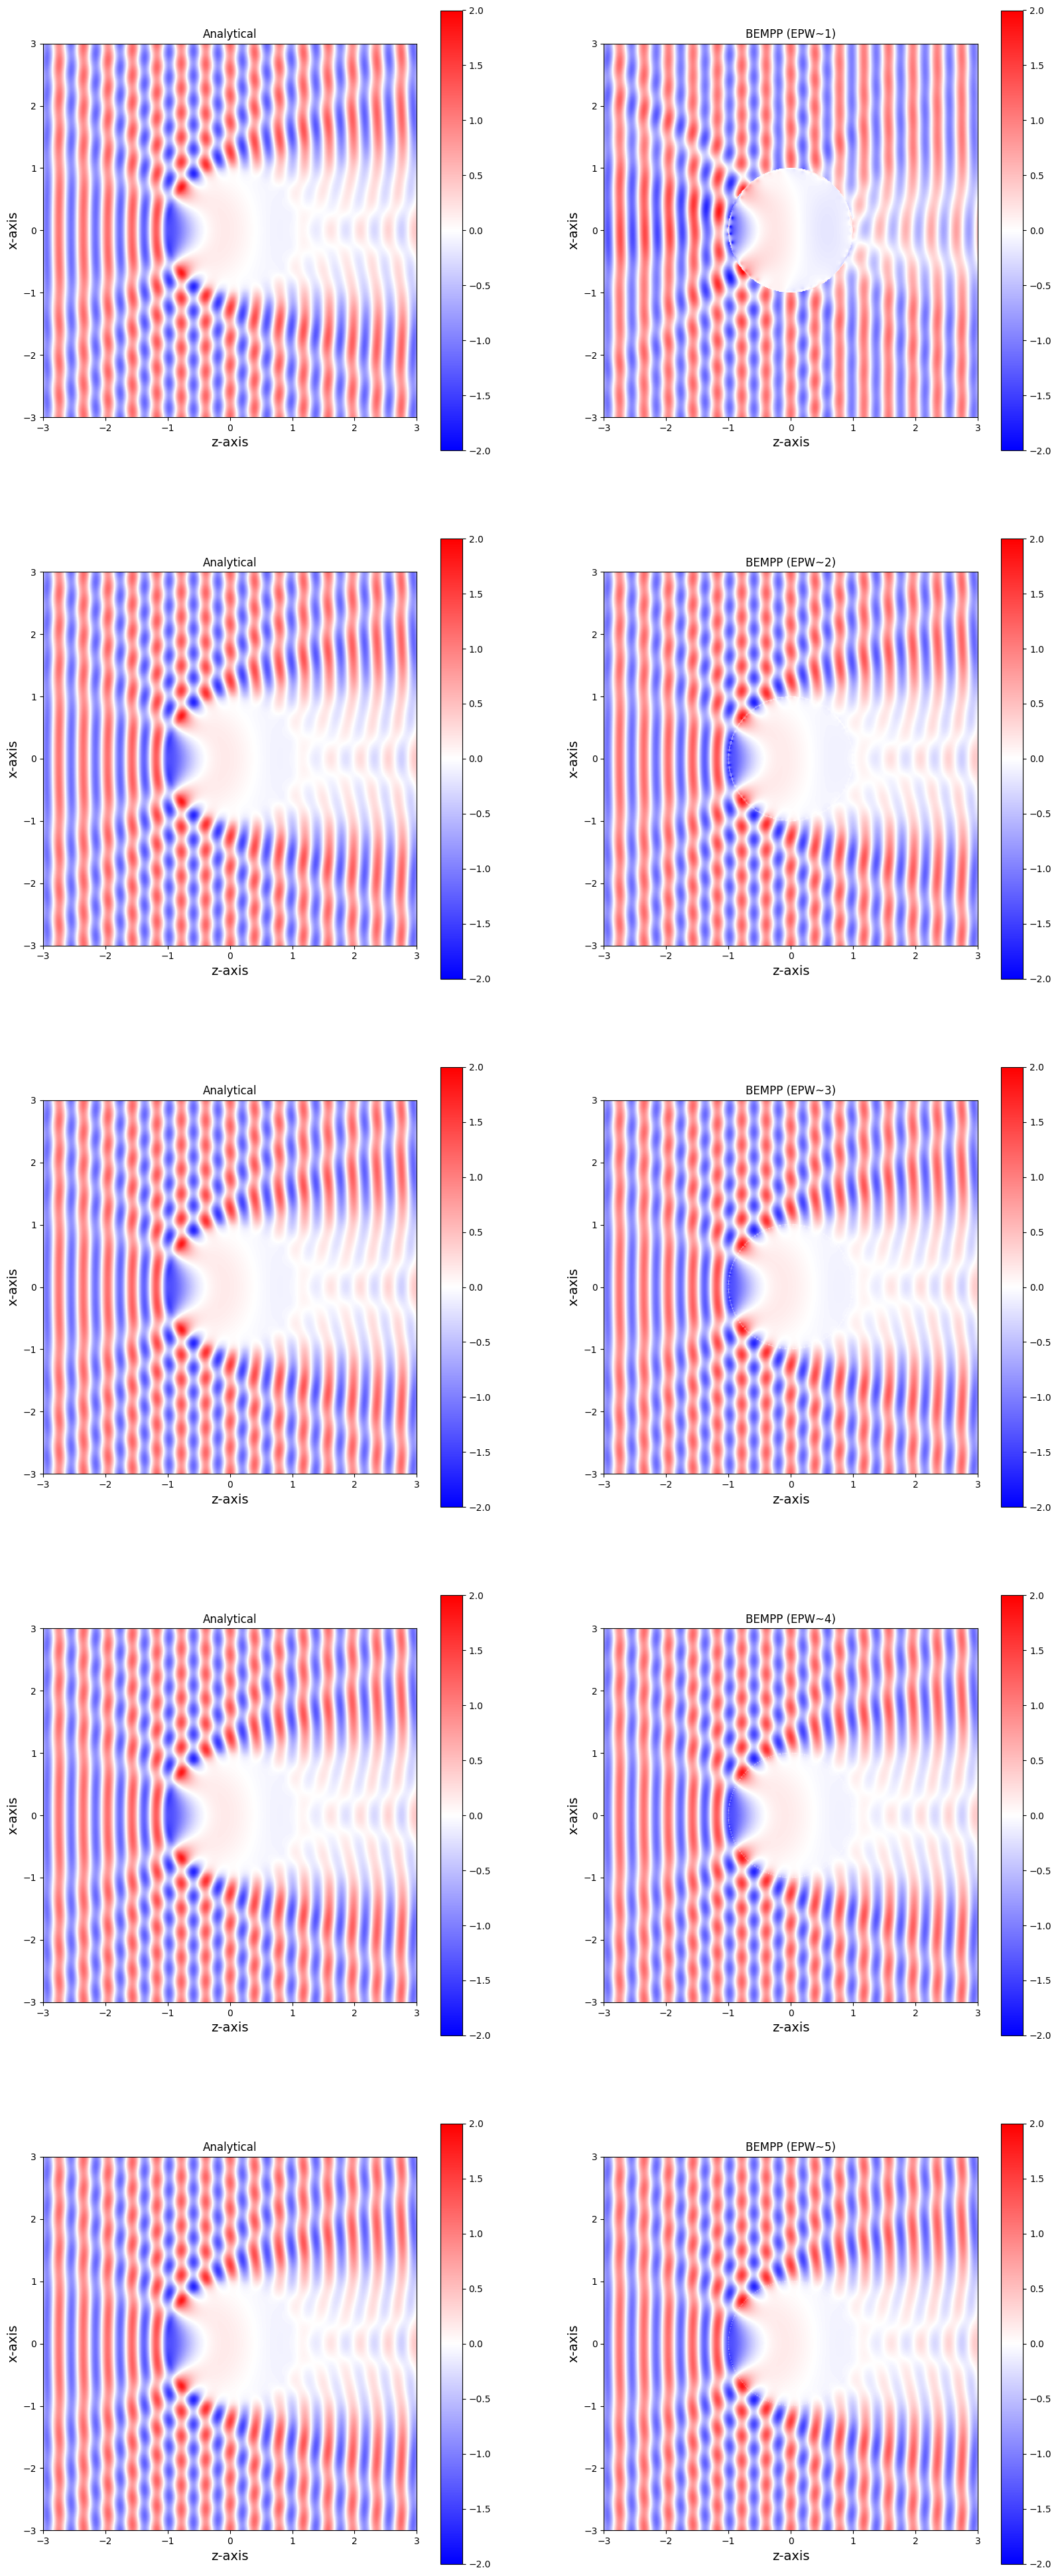

In [5]:
ncols = 2
nrows = len(params.ELEM_WAVELENGTH)

axs = (plt.figure(figsize=(10 * ncols, 10 * nrows)).subplots(nrows=nrows, ncols=2))

plt_info = [
    (
        (axs[i][0], f"Analytical", load_analytical(ke,ki,1,1)),
        (axs[i][1], f"BEMPP (EPW~{n})", load_bempp(ke,ki,1,1,n))
    )
    for i, n in enumerate(params.ELEM_WAVELENGTH)
]


for each_row in plt_info:
    for (ax, title, data) in each_row:
        ax.set_title(title)
        ax.set_xlabel('z-axis', size='14')
        ax.set_ylabel('x-axis', size='14')
        im = ax.imshow(data,
                       extent=[params.DMIN, params.DMAX, params.DMIN, params.DMAX],
                       vmin=-2, vmax=2,
                       cmap='bwr')
        ax.figure.colorbar(im, ax=ax)